# **Using Machine Learning KNN (K-Nearest Neighbors) to Solve Problems**

The main objective of this notebooke is to demonstrate the the best 

1.   Item da lista
2.   Item da lista

practices of solving a problem through the surpervioned machine learning algorithm **KNN** (K-Nearest Neighbors).

To comply with this goal the **IRIS** dataset is used, a very common dataset for data scientists for tests and studies in **ML** (Machine Learning). Furthermore, this is a built-in dataset for ***Scikit-Learn*** or ***Seaborn*** library.


> # **Iris Dataset**
* Iris is a genus of species of flowering plants with showy flowers.
* The iris species here studied, **setosa**, **versicolor** and **virginica** share a similar color: dark violet/blue.
* A way to distinguish visually the species among them is through their petals and sepals dimensions (lenght and width).

> **The first step is to import _Seaborn_ Library and then load the iris dataset from it.**

Differently from the Scikit-Learn that loads the dataset as arrays, Seaborn load it as Panda's Dataframe what saves some steps to build the dataframe, and so, some lines of codes.

In [34]:
import seaborn as sns
iris = sns.load_dataset("iris")

In [35]:
type(iris)

pandas.core.frame.DataFrame

The method **sample** of a Panda's Dataframe is great way to visualize how the data is stored, like the features and the kind of data of them, with random samples of the Dataframe, non ordered.  

In [36]:
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
37,4.9,3.6,1.4,0.1,setosa
108,6.7,2.5,5.8,1.8,virginica
106,4.9,2.5,4.5,1.7,virginica
1,4.9,3.0,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor


There are 4 features listed: "sepal length (cm)", "sepal width (cm)", "petal length (cm)" and "petal width (cm)", that describes three classes (species)
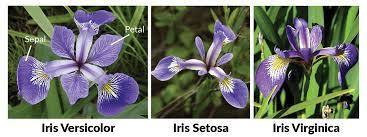

> **To perform some extra checks to the Dataframe, the Pandas library itself must be imported.**
Before starting any more in-deep work on any data it is essencial to do a prelimiary analysis of the data: the types of data, its sizes, some statistical figures, any missing values. Then, take the first conclusions and correct any issue* in appropriate way.

*this is not the case of this well-known data but the checks are to be performed anyway.

In [37]:
import pandas as pd

In [38]:
pd.value_counts(iris.species)

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

The dataset is made of 150 flowers (150 rows), 50 of each specie.

> **The statistical basic characteristics of the numeric columns.**

Through **describe** method the average, standard deviation, max and min, and the percentiles for each of the features.

In [39]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


It is clear each feature constrast with the others. However, at this time the data of the 3 species is put together and a graphical way suits better for an exploratory analysis.

The method **info** gives extra information about the dataframe and the type of data for each column:
* the features that are dimension of type float64
* the target, or species, of type object

In [40]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


The method **isnull** combined with the method **sum** returns if there is any null value in the dataframe that should be managed, otherwise, could imply in the impossibility of applying any machine learning algorithm.

In [41]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

> # **Exploratory Analysis through Charts**

**Seaborn** is a Python data visualization library based on **Matplotlib**. It provides a high-level interface for drawing attractive and informative statistical graphics.


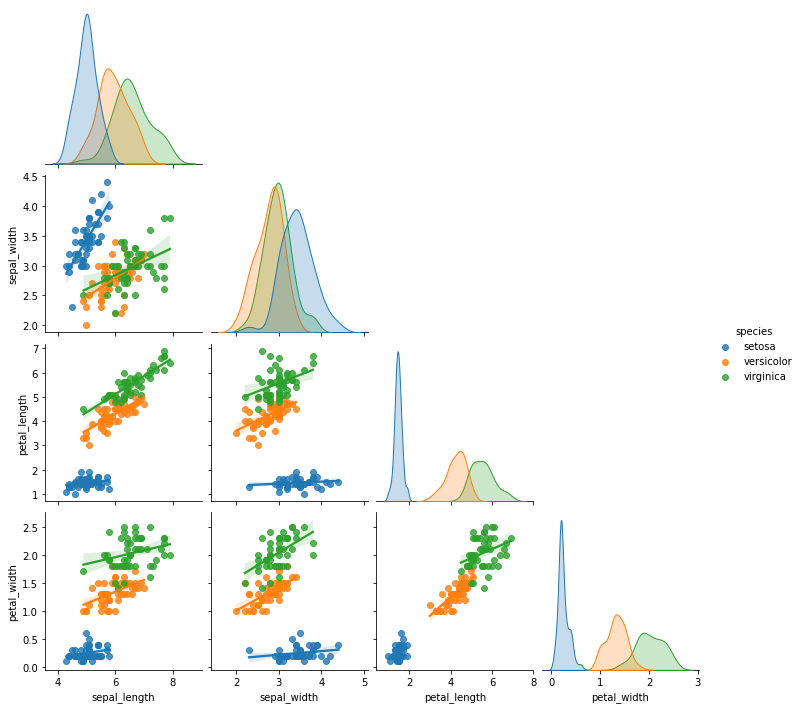

In [42]:
sns.pairplot(iris, hue="species", corner=True, kind='reg')

> ## **Setosa Identification**

**Iris-setosa**, **iris-virginica** and **iris-versicolor** have the same violet/blue color(sorry, my genre can't distinguish one from another). A way to distinguish the species is analyzing its petal and sepal dimensions and the proportions these them. Along with an exploratory analysis of the data it is possible to get valuable information and some conclusions. Follows.

As seen in the charts above, the data from **iris-setosa** is very distinguish from the other two species. With a data distribution like this, it is expected from any good predictive machine learning algorithm a high accuracy, maybe 100%. Or better, for the classification of this specie against the other two, **simply check it petal dimensions**; if its length is up to 2 cm or its width is up to 0.7 cm it is for sure iris-setosa.

In [43]:
print('Setosa maximum petal length in this dataset sample is', iris.loc[iris.species=='setosa'].max().petal_length, 'cm, as the other species the minimum is', iris.loc[(iris.species=='virginica') | (iris.species=='versicolor')].min().petal_length, 'cm.\nAbout the petal width, setosa maximun is', iris.loc[iris.species=='setosa'].max().petal_width, 'cm, and the other species minimum is', iris.loc[(iris.species=='virginica') | (iris.species=='versicolor')].min().petal_width, 'cm.')

Setosa maximum petal length in this dataset sample is 1.9 cm, as the other species the minimum is 3.0 cm.
About the petal width, setosa maximun is 0.6 cm, and the other species minimum is 1.0 cm.


In [44]:
from IPython.display import display
p_l = pd.pivot_table(iris, values=['petal_length'], index=['species'],aggfunc=[min,max], margins=False)
p_w = pd.pivot_table(iris, values=['petal_width'], index=['species'],aggfunc=[min,max], margins=False)
P_L = pd.DataFrame(p_l.to_records())
P_W = pd.DataFrame(p_w.to_records())
display(P_L),display(P_W)


,species,"('min', 'petal_length')","('max', 'petal_length')"
0,setosa,1.0,1.9
1,versicolor,3.0,5.1
2,virginica,4.5,6.9


,species,"('min', 'petal_width')","('max', 'petal_width')"
0,setosa,0.1,0.6
1,versicolor,1.0,1.8
2,virginica,1.4,2.5


(None, None)

> ## **Virginica and Versicolor Identification**

From the other two species. The data from **iris-versicolor** and **iris-virginica**, at the same time they are close, it is notorious a clear normal value for all its dimensions, except for the sepal width that is almost the same for both species. Due to this, it is possible to distinguish with a high percentage of accuracy when referring to the following relationships:

*   Petal Length **vs** Sepal Length or Sepal Width
*   Petal Width **vs** Sepal  Width or Sepal Width or Petal Length

The only relationship that is almost the same, and could not, through an exploratory analysis conclude which specie is between this two, as the dimensions and proportion between length and width, are quite the same is:

*   Sepal Length **vs** Sepal Width

An algorithm of Machine Learning is of great use for this classification, reducing any human mistake when comparing all this dimensions and relationships.

Both algorithms are used for the classification in this issue are optimal for this kind of data analysis.

They have some differences that could be said are simply their characteristics.

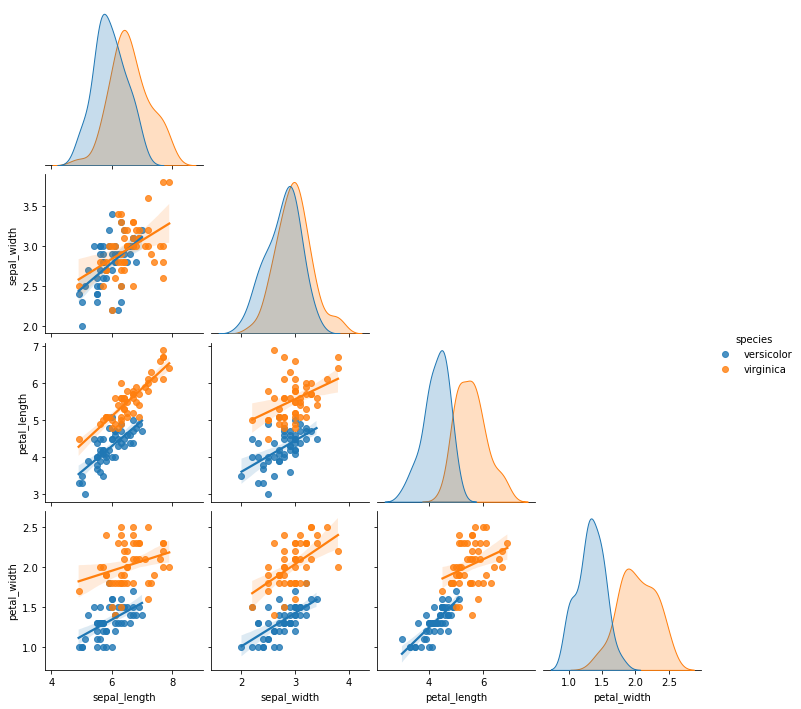

In [45]:
sns.pairplot(iris.loc[(iris.species=='virginica') | (iris.species=='versicolor')], hue="species", corner=True, kind='reg')

It is clear most of flowers could be identified its specie, but a few could be challenging. Why not a machine learning to help on this task. 

# **MACHINE LEARNING - Predictive Analysis**

After **performing the exploratory** analysis, what is basically, evaluate and reaching some conclusions looking to the charts of distribution and scatter of the data.

Now, the predictive analysis is going to be performed not by a person itself but with the aid of a computer, mathematical algorithms, **machine learning**.

The problem is going to be solved through the **KNN** algorithm. The best pratices are going to be performed and explained.

Scikit-learn is the library used here for machine learning in Python. From it several modulus are imported as needed.

> *Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities.*

> # **TRAIN and TEST Data**

The first step to perform a predictive analysis through a Machine Learning algorithm is to separate the data in two parts. One to be **trained**, so the coeficients are calculated to the best fit to this data, according to the algorithm chosen. The second part is reserved to be **tested**, so it is possible to ***evaluate the accuracy*** of the method with a different data, so that you can extrapolate to any data.

> This selection, of which part of the data is to be used as train and test is very important. We are going to use **70% as train** and **30% as test**. It is safe not to pick any skewed data to make it randomly. 

> ***Scikit-learn*** has a very good method for this, **train_test_split**; however, everytime you run this method it returns different samples as it makes it ramdomly, what would make the same problem impossible to replicate. The selection of the data can produces slight different results to the algorithm.**

> ***Panda*** has a solution for this, through a seeded random split of the database. The method **sample** set with **random_state=500** would meake it replicable by anyone. You are free to test with a different number, or even with *train_test_split*.

> The final result is:

>>*   **X_train** and **y_train** **-** for training, data and target, respectively
>>*   **X_test** **-** data for predicting with the algorithm
>>*   **y_test** **-** target for validation the model



In [46]:
train = iris.sample(frac=0.7, random_state=500) # random state is a seed value

In [47]:
test = iris.drop(train.index)

In [48]:
X_train = train.drop(labels='species', axis=1)

In [49]:
y_train = train.species

In [50]:
X_test = test.drop(labels='species', axis=1)

In [51]:
y_test = test.species

> **later was checked in the documentation, and the train_test_split method also has a seeded random split method, yet not the same, so same seed represents different data from Panda's sample method.

> Follows the option to use the train_test_split: simple, one line code:

>>>**from** sklearn.model_selection **import** train_test_split

>>>X_train,  X_test,  y_train,  y_test = train_test_split ( iris.drop ( 'species' ,axis = 1 ) , iris [ 'species' ] , test_size = 0.3, random_state = 1 )

> Following is a sample of the first 5 rows of the train data after being splitted.

* Every time the *train_test_split* method is run a *different sample* for test and train is selected as it works randomly with the data. Like this, everytime you have a different train data the performance can differ. To minimize this issue some techniques for training/testing with different parts of the dataset is recommended; this is called **cross validation** and is going to be used further ahead.

In [52]:
print(X_train.head(),"\n", y_train.head())

     sepal_length  sepal_width  petal_length  petal_width
7             5.0          3.4           1.5          0.2
126           6.2          2.8           4.8          1.8
136           6.3          3.4           5.6          2.4
133           6.3          2.8           5.1          1.5
66            5.6          3.0           4.5          1.5 
 7          setosa
126     virginica
136     virginica
133     virginica
66     versicolor
Name: species, dtype: object


> Following, the shapes of the splitted data.

In [53]:
X_train.shape,X_test.shape

((105, 4), (45, 4))

105 rows and 4 columns for the train against 45 rows (30%) and 4 columns for the test.

In [54]:
y_train.shape,y_test.shape

((105,), (45,))

105 rows for the train against 45 rows for the test, to the targets.

# **KNN - K Nearest Neighbors***

In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

> * In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

*from [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm). 

> ## **Instantiating the KNN Algorithm**

The KNN Classifier (KNeighborsClassifier) is imported from Scikit-learn.

The **KNeighborsClassifier** has some parameters to improve to improve its performance. At first only n_neighbors is going to be set, the others are to be as default. Later, an optimization analysis could be performed to adjust them.



In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn = KNeighborsClassifier(n_neighbors=3)

n_neighbors is set to be 3, what means it will take the specie classification to the average of three closest data.

> ## **Trainning the KNN algorithm**

At this step the algorithm is trained to estimate the best representative function for the data, according to the parameters being used.

**Fit** is the method to adjust the classifier to the data.

In [57]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Before predicting the results, it is possible to have the estimate mean accuracy on the given test data and labels. 

In [58]:
knn.score(X_test,y_test)

0.9555555555555556

> ## **Predicting with the Test Data and the KNN Algorithm**

With the algorithm trained and the function stablished it is possible to get the first results predicting against the test data (X_test).

**Predict** is the method to infer results from any data compatible to the ones of the train.

In [59]:
results = knn.predict(X_test)

This is the list of predicted specie of iris from the 45 samples in the **X_test** dataset. To validate the function the result should be matched against the authentic values, represented by **y_test**.

># **Validation**

Technics to to calculate and improve the accuracy and other performance metrics.

> ## **Cross Tabulation**

The **Cross Tabulation** method is used to verify if all flowers of a specif specie is predicted accordinly, the **recall**; and to verify if a specif specie predicted corresponds with the actual specie, the **precision**.

In [60]:
print(pd.crosstab(y_test, results, rownames=['Real'], colnames=['Predicted'], margins=True, margins_name='total'))

Predicted   setosa  versicolor  virginica  total
Real                                            
setosa          12           0          0     12
versicolor       0          20          2     22
virginica        0           0         11     11
total           12          20         13     45


With this separation of data of train and test the results table is as shown above.

To better comprehend the definition of recall and precision let's evaluate the **results of the specie VIRGINICA**:

* The specie is clearly identified, as all of them were identified accordingly. This is called **recall** of 100%.

* Contrasting, it could not be said it is precise, along with 100% **precision**, as of the 13 predicted virginica, two of them was in fact versicolor.

Following these metrics are calculated.

> ## **Classification Metrics**

With the **Metrics**, the calculated **precision** and **recall** of each specie is shown in tabular presentation.

The **f1-score** represents a weighted average between these two metrics. This is a great metric for not taking into account the True negatives that generally are irrelevant to the results.

The accuracy shows the fidelity of the algorithm in overall.

In [61]:
from sklearn import metrics

In [62]:
print(metrics.classification_report(y_test,results,target_names=iris.species.unique(), digits=3))

              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        12
  versicolor      1.000     0.909     0.952        22
   virginica      0.846     1.000     0.917        11

    accuracy                          0.956        45
   macro avg      0.949     0.970     0.956        45
weighted avg      0.962     0.956     0.956        45



The accuracy shown is the same from the knn method score, 95,6%.

> ## **Cross Validation**

As discussed, previously, in the **Train and Test Data**, the selection of data to be used for these two important parts of supervisioned machine learning can alter the efficiency of the model. In other words, different trainnind data mean a different fitted algorithm that gives in different prediction that could lead to different metrics.

This, only varying the selected samples, all parameters remaining the same.

To minimize this issue, a good solution is to use the **Cross Validation Method**, which splits the training data into **n** folds (in this case n = 5), and repeats the analysis of **fitting** and **predicting** **n** times, using at each time the amount of data reduced by one folder.

It is almost the same it was selected different data for the trainning, however, a smaller one. For more details on how this method works, consult the official documentation.

It optimizes the choosen metrics (in this case, accuracy) reducing the risk of **overfitting** when the classifier works wonderful with the trained data but not with the test by **averaging** the resultant metrics of eacho loop.


In [63]:
from sklearn.model_selection import cross_val_score

As discussed previously, the performance of the classifier depends on the seletected train and test data. From the data selected with sample random_state=500 the accuracy performance is 95,6%.

In [75]:
print("Accuracy: %0.1f" % (knn.score(X_test,y_test)*100),"%")

Accuracy: 95.6 %


In [66]:
scores = cross_val_score(knn, iris.drop('species',axis=1), iris.species, cv=5, scoring='accuracy')
scores

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])

With the cross validation it is seen that this performance could vary from 93% to 100%.

And so, the performance of the classifier is considered as the average of the cross validation. In this case 96,7% +/- 2,1%.

In [77]:
print("Accuracy for Cross Validation: %0.1f" % (scores.mean()*100),"%","(+/- %0.1f)" % (scores.std() * 100), "%")

Accuracy for Cross Validation: 96.7 % (+/- 2.1) %


If you are going to test for other parameters to your classifier this a much better performance metrics as it reduces the errors due selecting a specific split of data for train and test.

># **Optimizing the Parameter K (n_neighbors)**

> ## **Defining a List for Parameter K**

It is possible with the **GridSearch Objetc** to optimize the parameters of a classifier.

For the classification of the best parameters the Cross Validation Metrics shows up as a great metrics for the reasons formerly explained.

The **parameter K** from KNN was set as 3 initially without any criteria.

This parameter is going to be optimized. Initially a list of possible k factors is created, from 1 to 30.

In [78]:
k_list = list(range(1,31))

In [79]:
k_values = dict(n_neighbors=k_list)
print(k_values.keys()),
print(k_values.values())

dict_keys(['n_neighbors'])
dict_values([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]])


> ## **Instantiating the GridSearch Object**

The **GridSearch Objetc** performs an exhaustive search over specified parameter values for an estimator.

Its process performs in-built **fit** and **predict** methos, together with the **Cross Validation** Strategie.

The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
grid = GridSearchCV(knn, k_values, cv=5, scoring='accuracy')

> ## **Training the GridSearch Object**

In [82]:
grid.fit(iris.drop('species', axis=1), iris.species)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=3, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

> ## **Checking for the Scores**

Time to check the performance of the classifier over all the parameters listed to the GridSearch Objetc.

In [83]:
grid.cv_results_
grid_table = pd.DataFrame(grid.cv_results_)
grid_table.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002549,0.000834,0.004816,0.000879,1,{'n_neighbors': 1},0.966667,0.966667,0.933333,0.933333,1.0,0.960000,0.024944,19
1,0.002099,0.000052,0.005022,0.000299,2,{'n_neighbors': 2},0.966667,0.933333,0.933333,0.900000,1.0,0.946667,0.033993,26
2,0.002098,0.000147,0.004549,0.000321,3,{'n_neighbors': 3},0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,10
3,0.002063,0.000249,0.003887,0.000831,4,{'n_neighbors': 4},0.966667,0.966667,0.966667,0.966667,1.0,0.973333,0.013333,6
4,0.001885,0.000469,0.003075,0.000529,5,{'n_neighbors': 5},0.966667,1.000000,0.933333,0.966667,1.0,0.973333,0.024944,6


The cv_results_ method lists several metrics based on the accuracy of the classifier knn with different K (number of neighbors), from time duration to best accuracy itself.

In [84]:
for key in grid.cv_results_.keys():
  print(key) 

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_n_neighbors
params
split0_test_score
split1_test_score
split2_test_score
split3_test_score
split4_test_score
mean_test_score
std_test_score
rank_test_score


In [85]:
grid_table_rank = grid_table[['params','mean_test_score','std_test_score','rank_test_score']].loc[grid_table['rank_test_score']==1].sort_values(by='std_test_score', ascending=True)
grid_table_rank

,params,mean_test_score,std_test_score,rank_test_score
5,{'n_neighbors': 6},0.98,0.016330,1
6,{'n_neighbors': 7},0.98,0.016330,1
9,{'n_neighbors': 10},0.98,0.026667,1
10,{'n_neighbors': 11},0.98,0.026667,1
11,{'n_neighbors': 12},0.98,0.026667,1


> The best accuracy with the lowest k is as follows. 

In [86]:
print("The best value of k = {} with {} of accuracy.".format(grid.best_params_,grid.best_score_))

The best value of k = {'n_neighbors': 6} with 0.9800000000000001 of accuracy.


> It also has the lowest standard deviation among the ranked number 1.

> The rank depends only in the accuracy, as selected in the GridSearch.

In [87]:
print("The best k value, rank {}, with k = {}, highest mean accuracy along with the cross validation = {} and lowest standard deviation = {}".format(grid_table.at[grid.best_index_,'rank_test_score'],grid_table.at[grid.best_index_,'params'],grid_table.at[grid.best_index_,'mean_test_score'],grid_table.at[grid.best_index_,'std_test_score']))

The best k value, rank 1, with k = {'n_neighbors': 6}, highest mean accuracy along with the cross validation = 0.9800000000000001 and lowest standard deviation = 0.016329931618554516


> Following, the **classifier itself** with it better set.

In [88]:
print("The best classifier is: {}".format(grid.best_estimator_))

The best classifier is: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


> ## **Charts**

Graphically, the list of results of the k number of neighbors versus the accuracy. 

In [89]:
import matplotlib.pyplot as plt

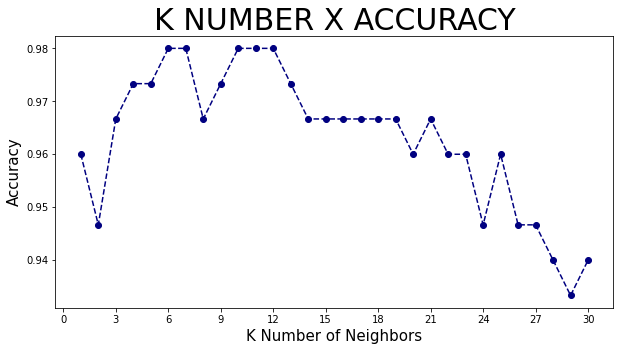

In [90]:
graphic = grid.cv_results_['mean_test_score']
graphic

plt.figure(figsize=(10,5))
plt.plot(k_list,graphic,color='navy',linestyle='dashed',marker='o')
plt.xlabel('K Number of Neighbors', fontdict={'fontsize': 15})
plt.ylabel('Accuracy', fontdict={'fontsize': 15})
plt.title('K NUMBER X ACCURACY', fontdict={'fontsize': 30})
plt.xticks(range(0,31,3),)
#plt.xaxis.set_major_locator(MultipleLocator(3))
plt.show()

# **Conclusions and Next Steps**

The issue is exaustive, other parameters should be tested with the **GridSearch Object**. However this database is very simple and these changes could indicate no differ.

For sure, the best way for performing the optimization with these sensibility analysis, is through **Pipelines**.



# **Acknowledgment**

This notebook was extract from:

*   Karinne Cristina, [Tutor of Minerando's Data Science do Zero](https://www.linkedin.com/in/rodrigo-santana-ferreira-0ab041128/)
*   Maykon Schots, [Data Scientist at Volvo Group](https://www.linkedin.com/in/maykon-schots-a543b49/)
*   Plínio Mendes, [Software Engineer at Google](https://www.linkedin.com/in/pliniofm/)
*   Rodringo Santana, [Co-Founder of Minerando Dados](https://www.linkedin.com/in/rodrigo-santana-ferreira-0ab041128/)



